In [4]:
from qiskit import *
%matplotlib inline

In [44]:
circuit= QuantumCircuit(3,3)

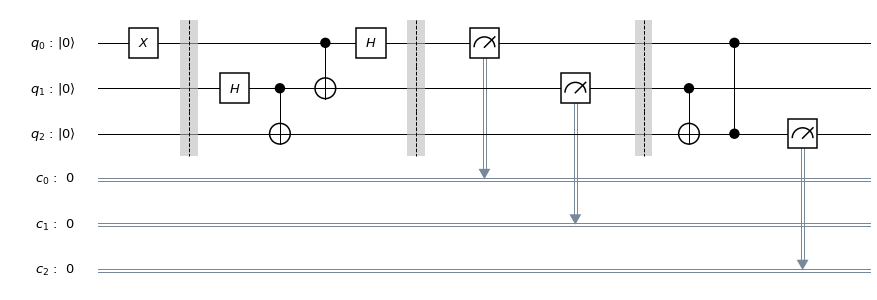

In [47]:
circuit.draw(output = 'mpl')

In [46]:
circuit.x(0)
circuit.barrier()
circuit.h(1)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.measure(2,2)

In [48]:
simulator = Aer.get_backend('qasm_simulator')

In [49]:
result = execute(circuit, backend=simulator, shots=1024).result()
from qiskit.tools.visualization import plot_histogram
counts = result.get_counts()

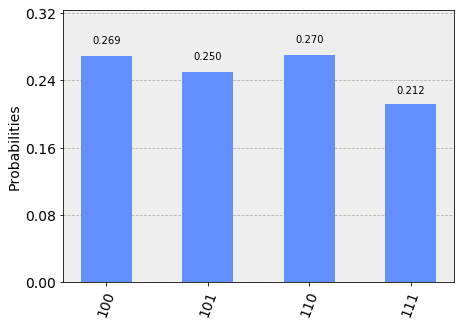

In [50]:
plot_histogram(counts)

In [18]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:
provider = IBMQ.get_provider('ibm-q')

In [21]:
qcomp = provider.get_backend('ibmq_essex')

In [22]:
job = execute(circuit, backend=qcomp)

In [23]:
from qiskit.tools.monitor import job_monitor

In [25]:
job_monitor(job)

Job Status: job has successfully run


In [26]:
result = job.result()

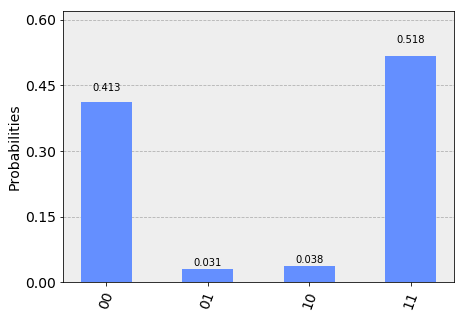

In [27]:
plot_histogram(result.get_counts(circuit))